In [1]:
%load_ext autoreload
%autoreload 2
import pickle, json
from enterprise_extensions.models import model_2a
from enterprise.signals.parameter import sample as sample_params
import numpy as np
from impulse.impulse import sample, parallel_sample, pt_sample
import matplotlib.pyplot as plt
from emcee.autocorr import integrated_time

In [2]:
with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/psrs.pkl', 'rb') as f:
    psrs = pickle.load(f)

with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/channelized_12p5yr_v3_full_noisedict.json', 'r') as f:
    params = json.load(f)

In [3]:
pta = model_2a([psrs[0]], noisedict=params, gamma_common=4.33, n_gwbfreqs=5, tm_marg=True, tnequad=True, tm_svd=True)

In [43]:
x0 = [np.array(list(sample_params(pta.params).values())) for _ in range(4)]

In [44]:
res = pt_sample(pta.get_lnlikelihood, pta.get_lnprior, len(x0[0]), x0, ntemps=4, num_samples=300_000)

  0%|          | 0/300 [00:00<?, ?it/s]/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))
  1%|          | 3/300 [00:02<04:18,  1.15it/s]/Users/aaron/Documents/GitHub/impulse_mcmc/impulse/ptsampler.py:102: RuntimeWarning: invalid value encountered in subtract
  lnchainswap = (1 / ladder[:-1] - 1 / ladder[1:]) * (lnlike[-1, :-1] - lnlike[-1, 1:])
 24%|██▎       | 71/300 [00:45<02:21,  1.62it/s]

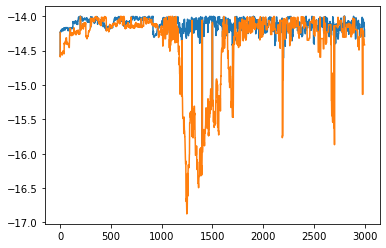

In [21]:
ii = 2
plt.plot(res[:3000, ii, 0])
plt.plot(res[:3000, ii, 1])

(array([0.12939288, 0.12077304, 0.12613067, 0.12041586, 0.13320275,
        0.11841568, 0.12286847, 0.11893953, 0.12848803, 0.12594018,
        0.12646404, 0.12186838, 0.13348849, 0.13229791, 0.13229791,
        0.14320368, 0.13813178, 0.13884613, 0.13863183, 0.14429902,
        0.15627631, 0.17225397, 0.16049098, 0.16599149, 0.16968231,
        0.1840884 , 0.17680201, 0.19949458, 0.19825637, 0.17396842,
        0.17577811, 0.18475513, 0.18723154, 0.16834885, 0.17308738,
        0.15994331, 0.15465711, 0.15187114, 0.14591821, 0.14829938,
        0.13767936, 0.11862998, 0.12382094, 0.11965389, 0.12713077,
        0.1103435 , 0.11086736, 0.10998633, 0.09903294, 0.08507927]),
 array([2.28852783e-04, 1.40215948e-01, 2.80203044e-01, 4.20190139e-01,
        5.60177234e-01, 7.00164330e-01, 8.40151425e-01, 9.80138521e-01,
        1.12012562e+00, 1.26011271e+00, 1.40009981e+00, 1.54008690e+00,
        1.68007400e+00, 1.82006109e+00, 1.96004819e+00, 2.10003528e+00,
        2.24002238e+00, 2.3800

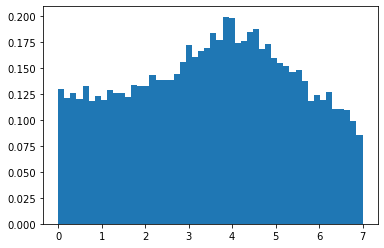

In [23]:
plt.hist(res[:, 0, 0], bins=50, density=True)

In [ ]:
plt.plot()

(array([135600.,  86100.,  75300.,      0.,      0.,    600.,    600.,
           600.,    300.,    900.]),
 array([0.1025485 , 0.32518653, 0.54782455, 0.77046258, 0.9931006 ,
        1.21573862, 1.43837665, 1.66101467, 1.88365269, 2.10629072,
        2.32892874]),
 <BarContainer object of 10 artists>)

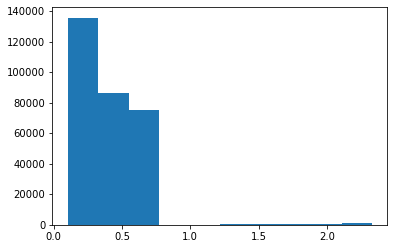

In [16]:
plt.hist(res[:, 0, 0])

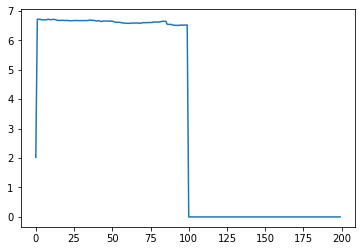

In [43]:
plt.plot(res[:200, 0, 1])

In [35]:
print(res[100:200])

[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.

In [23]:
print(res[101:200])

[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.

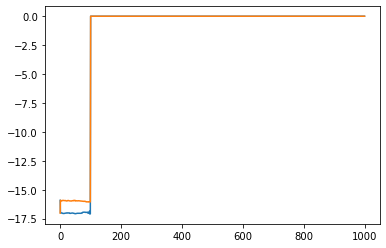

In [14]:
ii = 2
plt.plot(res[0:1000, ii, 0])
plt.plot(res[0:1000, ii, 1])

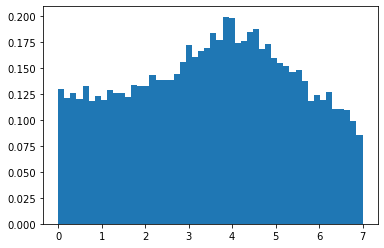

In [25]:
plt.hist(res[:, 0, 0], bins=50, density=True)
plt.show()

In [26]:
# res = parallel_sample(4, 4, pta.get_lnlikelihood, pta.get_lnprior, len(pta.params), x0, num_samples=300_000)

In [12]:
chain = np.vstack(res)

In [27]:
import corner

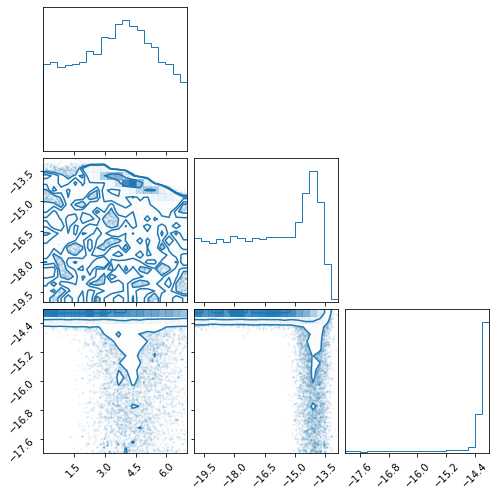

In [28]:
thing = corner.corner(res[::10, :3, 0], hist2d_kwargs={"density":True}, color='C0', kwargs={"density":True})
plt.show()

In [57]:
from PTMCMCSampler.PTMCMCSampler import PTSampler as ptmcmc

Do not have acor package


In [12]:
ndim = len(x0)
cov = np.diag(np.ones(ndim) * 0.01**2)

outDir = './chains/sngl/'

sampler = ptmcmc(ndim, pta.get_lnlikelihood, pta.get_lnprior, cov,
                 outDir=outDir, resume=False)

In [13]:
N = int(1e6)
x0 = np.hstack([p.sample() for p in pta.params])
sampler.sample(x0, N, SCAMweight=30, AMweight=15, DEweight=50, )

Finished 0.10 percent in 0.247820 s Acceptance rate = 0.968

/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))


Finished 1.00 percent in 2.066722 s Acceptance rate = 0.288489Adding DE jump with weight 50
Finished 99.90 percent in 181.617322 s Acceptance rate = 0.213474
Run Complete


In [30]:
outDir = './chains/sngl/'
with open(outDir + 'chain_1.txt', 'r') as f:
    chain2 = np.loadtxt(f)

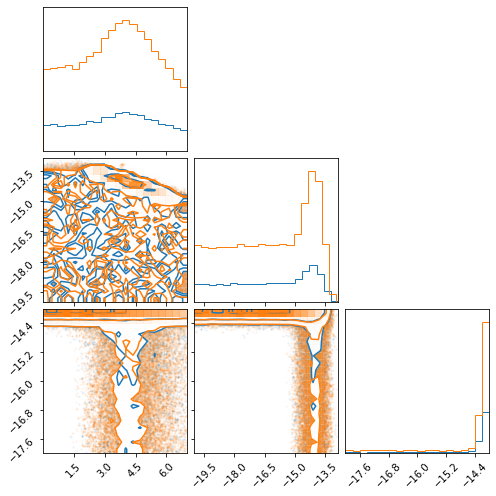

In [31]:
corner.corner(chain2[:, :3], hist2d_kwargs={'density':True}, fig=thing, color='C1', kwargs={"density":True})

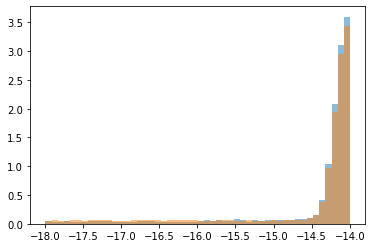

In [41]:
ii = 2
__, bins, __ = plt.hist(res[200_000:, ii, 0], bins=50, density=True, alpha=0.5)
plt.hist(chain2[20_000:, ii], bins=bins, density=True, alpha=0.5)
plt.show()

In [38]:
ii = 2
print(integrated_time(chain2[:, ii]))
print(integrated_time(res[:, ii, 0], quiet=True) / 10)

[22.94130901]
[25.13977334]


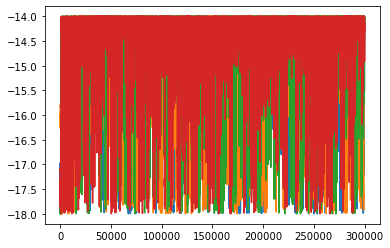

In [38]:
plt.plot(res[0][:, 2])
plt.plot(res[1][:, 2])
plt.plot(res[2][:, 2])
plt.plot(res[3][:, 2])

In [7]:
ndim = 136
tstep = 1 + np.sqrt(2 / ndim)

In [10]:
ntemps = 4

In [11]:
tmin = 1

In [23]:
ii = np.arange(ntemps)
ladder = tmin * tstep**ii